<a href="https://colab.research.google.com/github/aldamian/H3-Hackathon/blob/main/OCR_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup

Pooppler-utils -> linux package for rendering PDF documents. Required for pdf2image.  
Torch and easyocr - neural network text extraction tool


In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (339 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!pip install pdf2image
!pip3 install torch torchvision torchaudio
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 17 kB/s 
     |████████████████████████████████| 47.6 MB 1.4 MB/s 


Spacy - name entity recognition

In [3]:
import PIL
import spacy
import easyocr
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pdf2image import convert_from_path
from PIL import ImageDraw
from google.colab import files

In [4]:
reader = easyocr.Reader(['ro'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [5]:
uploaded = files.upload()

Saving Externare.pdf to Externare.pdf


In [ ]:
images = convert_from_path("Externare.pdf")

In [ ]:
from IPython.display import display, Image
# display(images[0])

Draw bounding boxes

In [ ]:
bounds_firstpage = reader.readtext(np.array(images[0]), 
                                   min_size=0, 
                                   slope_ths=0.2, 
                                   ycenter_ths=0.7, 
                                   height_ths=0.6, 
                                   width_ths=0.8, 
                                   decoder='beamsearch',
                                   beamWidth=10)

In [ ]:
bounds_secondpage = reader.readtext(np.array(images[1]), 
                                    min_size=0, 
                                    slope_ths=0.2, 
                                    ycenter_ths=0.7, 
                                    height_ths=0.6, 
                                    width_ths=0.8, 
                                    decoder='beamsearch',
                                    beamWidth=10)

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

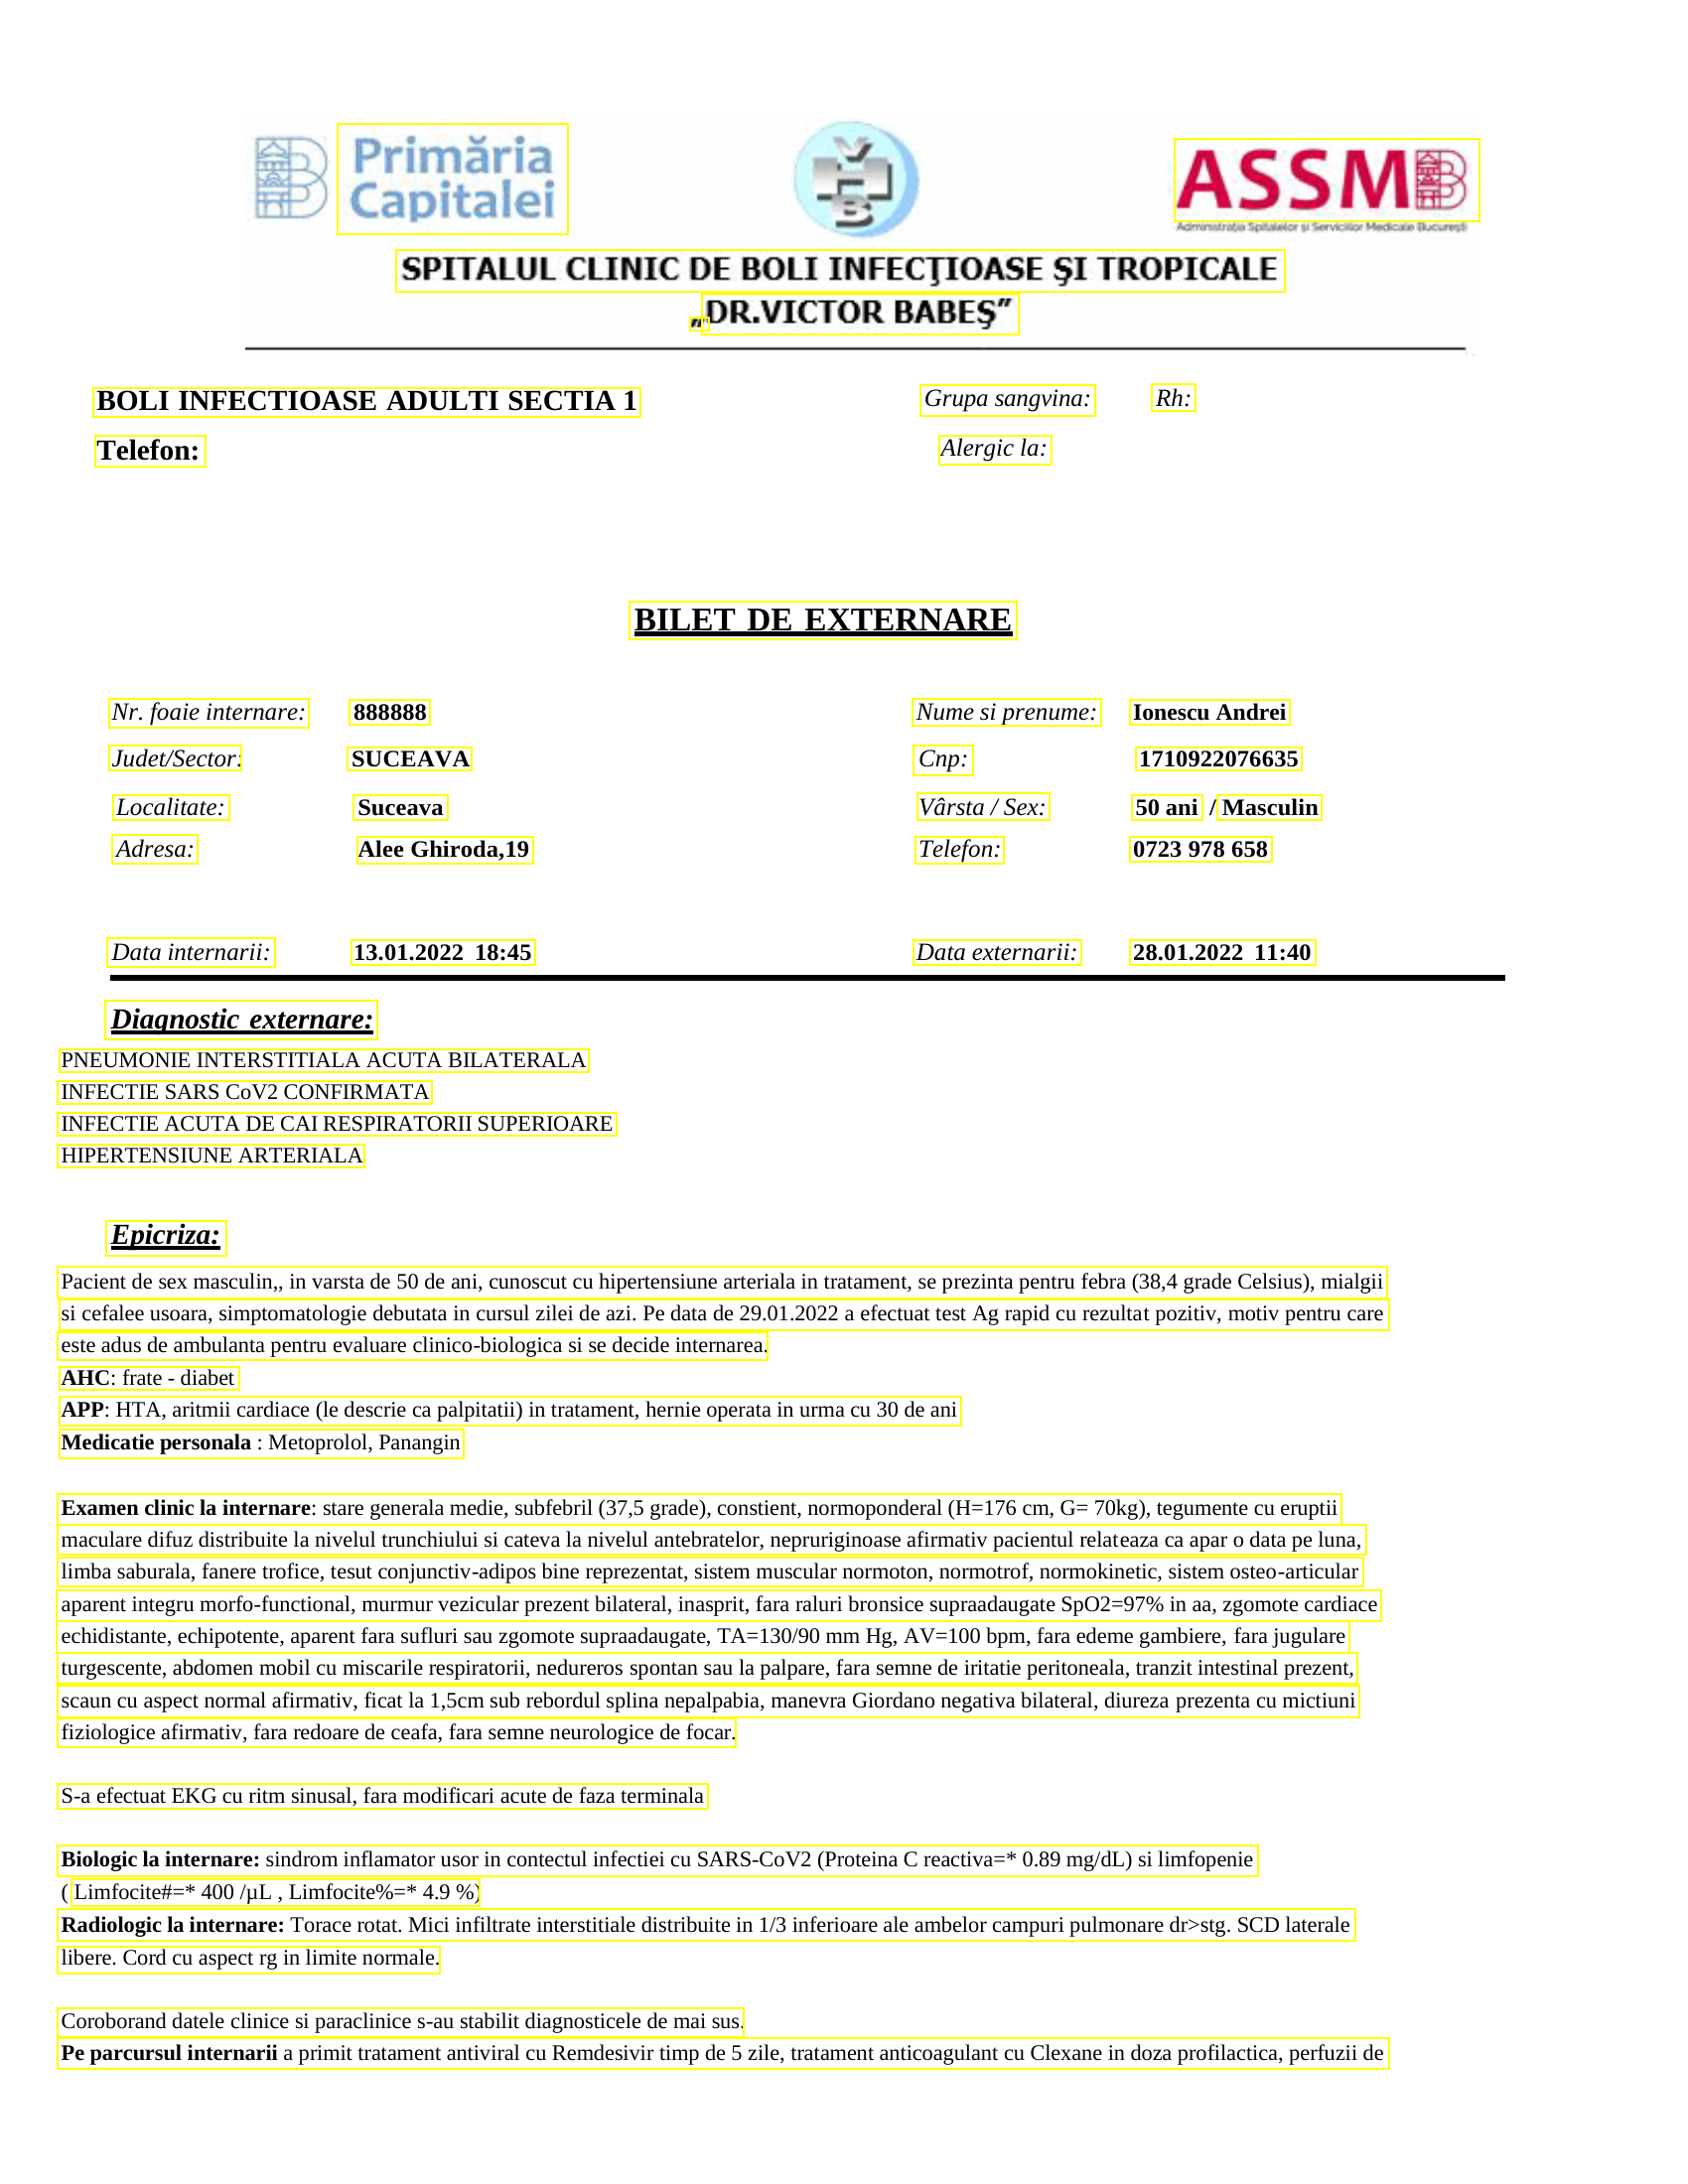

In [ ]:
draw_boxes(images[0], bounds_firstpage)

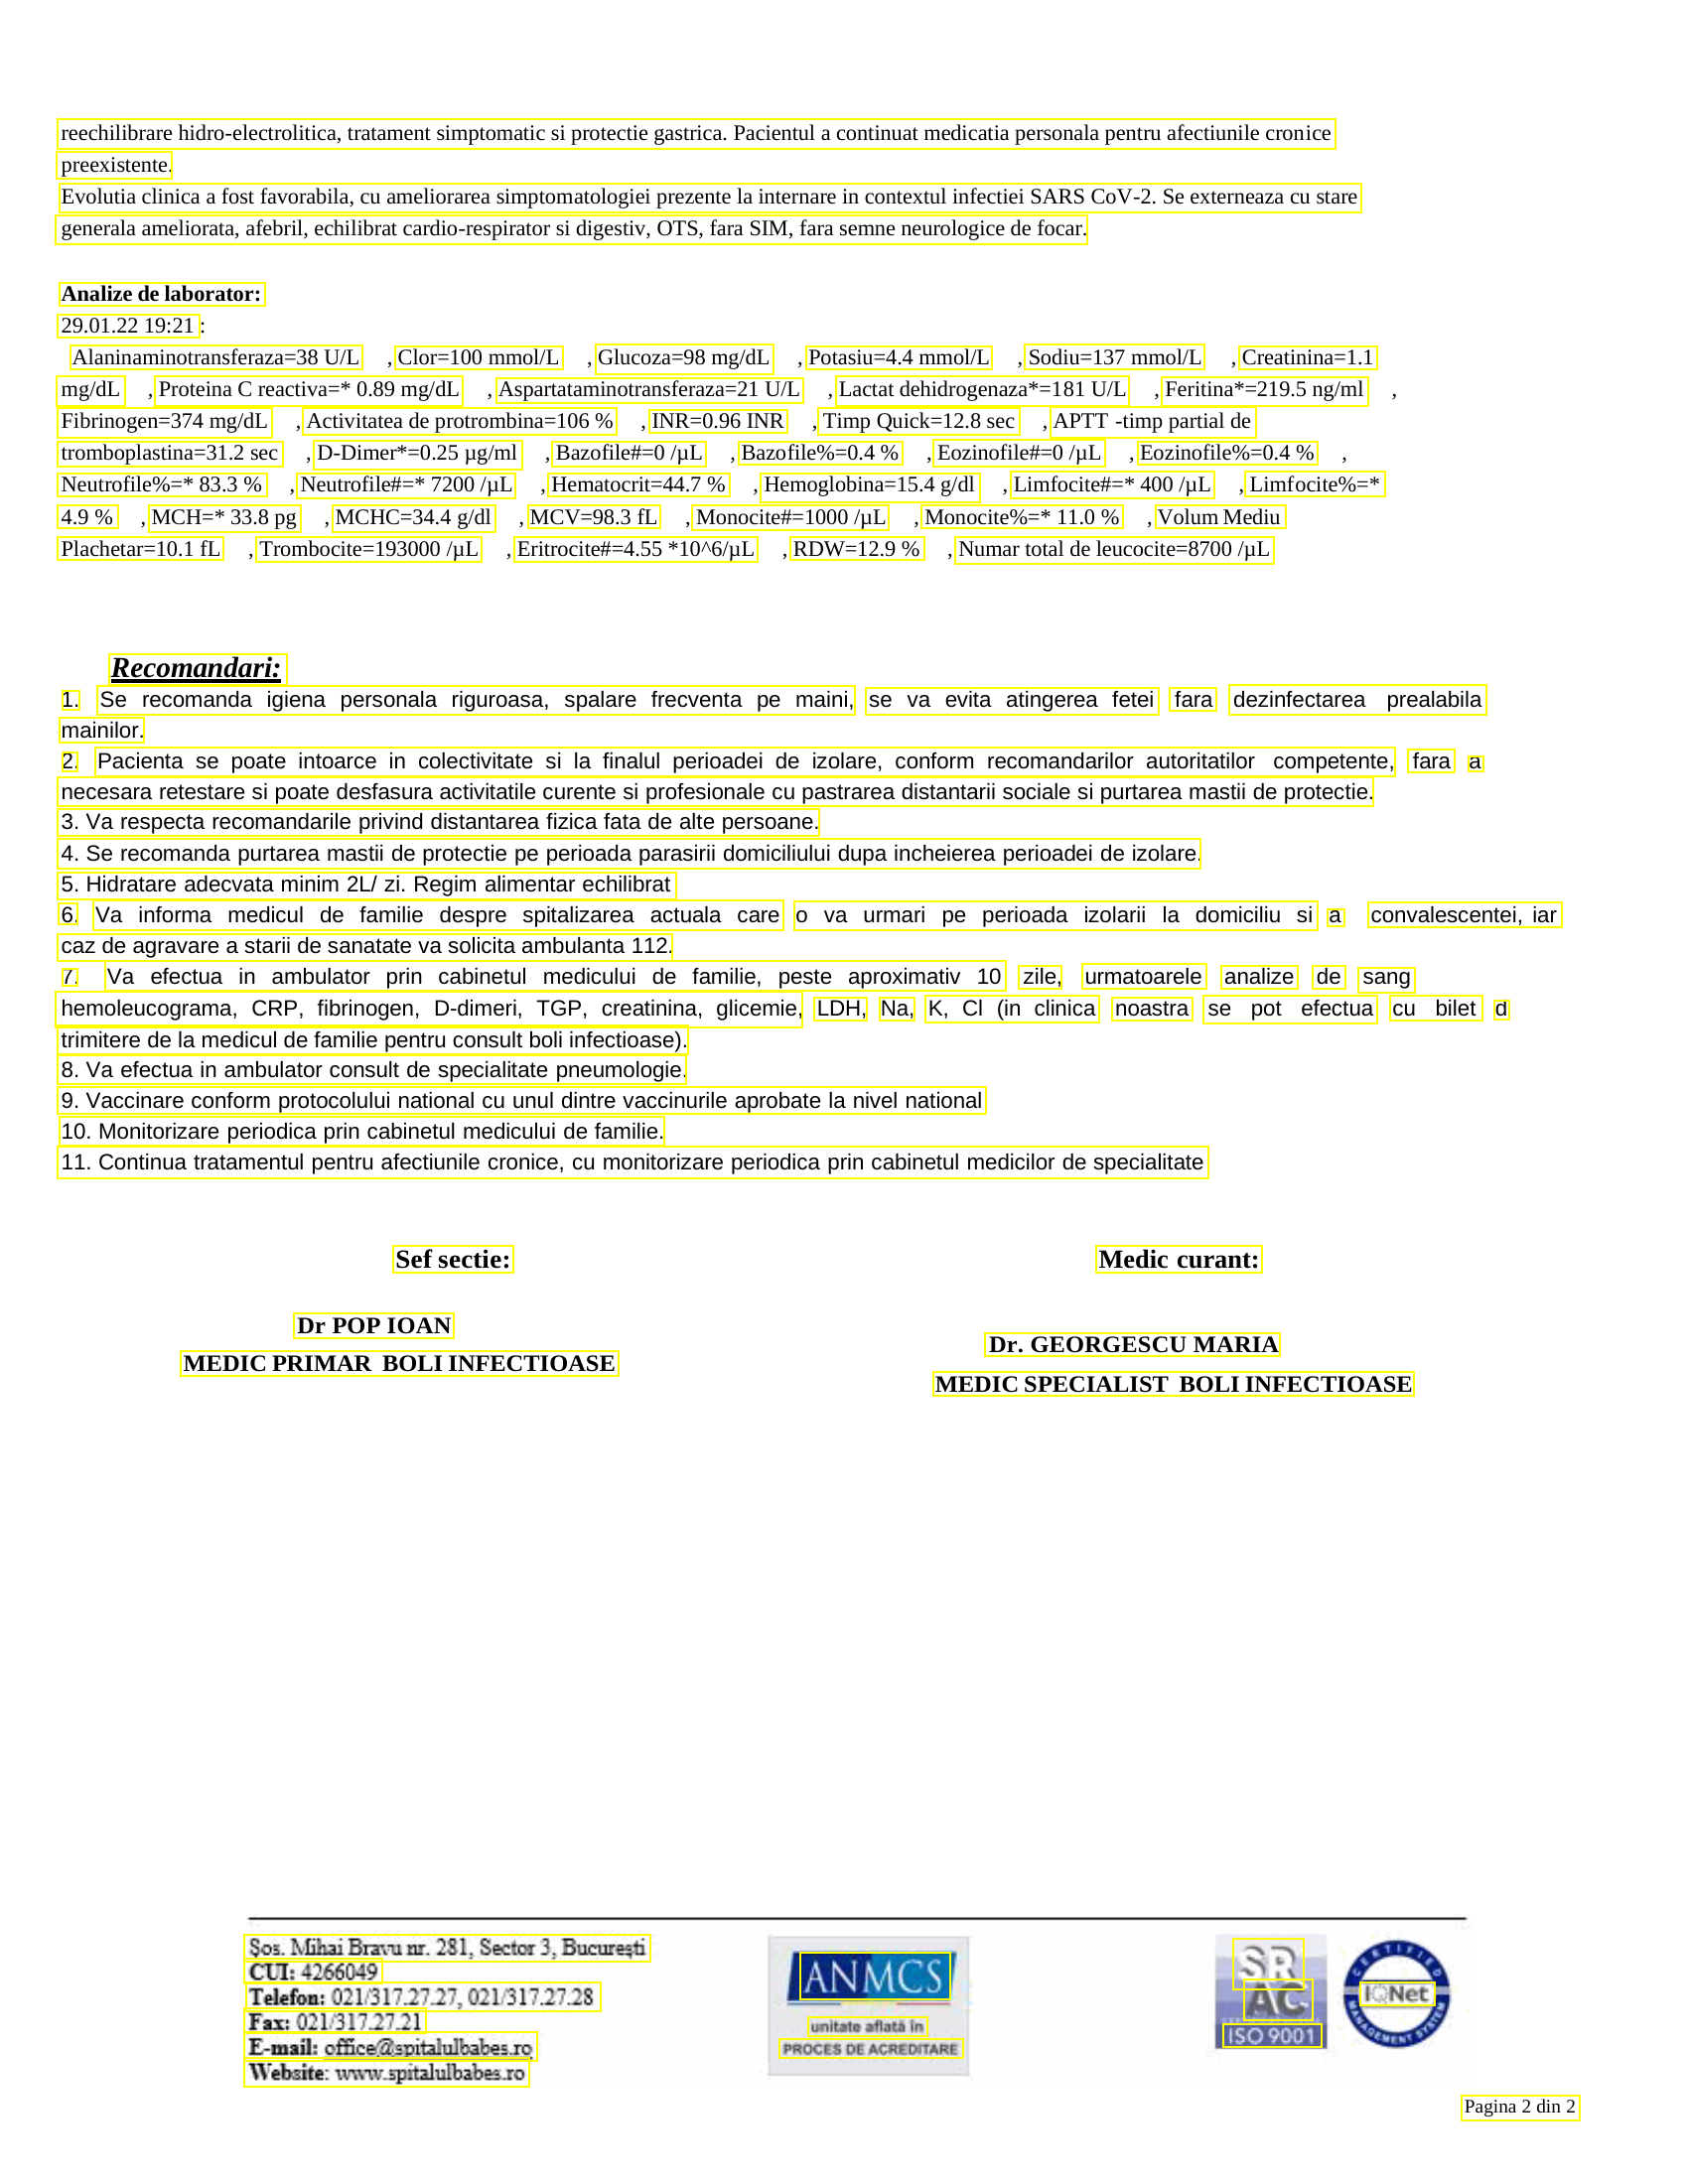

In [ ]:
draw_boxes(images[1], bounds_secondpage)

In [ ]:
bounds_firstpage[1][1]
bounds_secondpage[1][1]

'preexistente'

# Concatenate the text

In [ ]:
text = ''
concat_bounds = bounds_firstpage + bounds_secondpage

for i in range(len(concat_bounds)):
  text += concat_bounds[i][1] + '\n'

print(text)

Erimnări
ASSMB
SPITALUL CLINIC DE BOLI INFECJIOASE SI TROPICALE
[
DR.VICTOR BABES"
BOLI INFECTIOASE ADULTI SECTIA 1
Grupa sangvina:
Rh:
Telefon:
Alergic la:
BILETDE EXTERNARE
Nr. foaie internare:
888888
Nume si prenume:
Ionescu Andrei
JudetSector
SUCEAVA
Cnp:
1710922076635
Localitate:
Suceava
Vârsta / Sex:
50 ani
Masculin
Adresa:
Alee Ghiroda,19
Telefon:
0723 978 658
Data internarii:
13.01.2022 18.45
Data externarii:
28.01.2022 1l.40
Diaqnostic_externare:
PNEUMONIE INTERSTITIALA ACUTA BILATERALA
INFECTIE SARS CoV2 CONFIRMATA
INFECTIE ACUTA DE CAI RESPIRATORII SUPERIOARE
HIPERTENSIUNE ARTERIALA
Epicriza:
Pacient de sex masculin, in varsta de 50 de ani; cunoscut cu hipertensiune arteriala in tratament; se prezinta pentru febra (38,4 grade Celsius) mialgii
si cefalee usoara, simptomatologie debutata in cursul zilei de azi. Pe data de 29.01.2022 a efectuat test Ag rapid cu rezultat pozitiv, motiv pentru care
este adus de ambulanta pentru evaluare clinico-biologica si se decide internarea
A

# Load model

Using spacy large romanian language model.   
It was trained on news and media.  
More info at: https://spacy.io/models/ro/  
Conclusion after testing: using an NLP model is hard to do, since there are no romanian language models on medical data.  
Using an NLP model would mean better ablility to generalize, and in the long run it is the preffered approach. A workaround is to translate the text and use an English NLP model. 



In [ ]:
# !python -m spacy download ro_core_news_lg

In [ ]:
# Translate text to english to perform NLP and back to Romanian for display